# Titanic Model

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

In [5]:
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [25]:
X=df.drop(labels=['fare','class','adult_male','deck','embark_town','alive','alone','survived'],axis=1)
Y=df['survived']


In [26]:
X


,pclass,sex,age,sibsp,parch,embarked,who
0,3,male,22.0,1,0,S,man
1,1,female,38.0,1,0,C,woman
2,3,female,26.0,0,0,S,woman
3,1,female,35.0,1,0,S,woman
4,3,male,35.0,0,0,S,man
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,S,man
887,1,female,19.0,0,0,S,woman
888,3,female,NaN,1,2,S,woman
889,1,male,26.0,0,0,C,man


In [27]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [28]:
X.isnull().sum()

pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
who           0
dtype: int64

In [30]:
X['age'].fillna((X['age'].mean()),inplace=True)

In [31]:
X.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    2
who         0
dtype: int64

In [32]:
X['embarked'].fillna((X['embarked'].mode()),inplace=True)

In [33]:
X.isnull().sum()


pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    2
who         0
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()


In [40]:
le.fit(X['embarked'])
X['embarked']=le.transform(X['embarked'])
le.fit(X['sex'])
X['sex']=le.transform(X['sex'])
X=X.drop('who',axis=1)

In [41]:
X


,pclass,sex,age,sibsp,parch,embarked
0,3,1,22.000000,1,0,2
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,2
3,1,0,35.000000,1,0,2
4,3,1,35.000000,0,0,2
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,2
887,1,0,19.000000,0,0,2
888,3,0,29.699118,1,2,2
889,1,1,26.000000,0,0,0


In [48]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [49]:
bestFeatures=SelectKBest(score_func=f_regression,k='all')
fit=bestFeatures.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat((dfcolumns,dfscores),axis=1)
featureScores.columns=['features','scores']

In [50]:
featureScores

,features,scores
0,pclass,115.031272
1,sex,372.405724
2,age,4.353516
3,sibsp,1.110572
4,parch,5.963464
5,embarked,24.422821


In [51]:
from sklearn.ensemble import ExtraTreesClassifier



In [52]:
model=ExtraTreesClassifier()
model.fit(X,Y)
model.feature_importances_


array([0.13413157, 0.3431328 , 0.363677  , 0.06604333, 0.0556296 ,
       0.0373857 ])

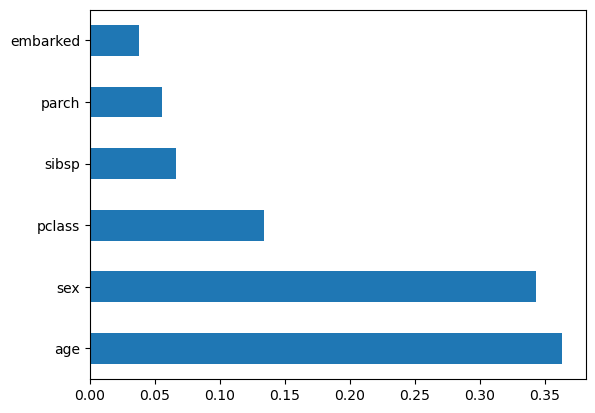

In [111]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(6
                        ).plot(kind='barh')
plt.show()

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [168]:
logr=RandomForestClassifier()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)
logr.fit(X_train,Y_train)

RandomForestClassifier()

In [169]:
y_pred=logr.predict(X_test)

In [171]:
print(accuracy_score(Y_test,y_pred))

0.8044692737430168


In [174]:
user_input=np.array([[1,0,38.000000,1,0,0]])
y_pred=logr.predict(user_input)
print(y_pred)

[1]


C:\Users\Harshavardhan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
